# MD at constant temperature

## Point 1
1. Perform a simulation of a Lennard Jones crystal with 864 particles. Temperature should be controlled using the Langevin thermostat at temperature T = 2. Try with different values of the friction γ (e.g. 0.01, 0.1, 1.0, 10.0) and look at the difference in the behavior of the potential energy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numba.np.ufunc import _internal

In [19]:
nparticles = 864

nlattice = (nparticles/4)**(1/3) # number for lattice.py

approx. n. of particles per side:  5.999999999999999


In [4]:
%%bash
python3 xyz/lattice.py 6 > crystal864.xyz

In [8]:
%%bash

mkdir -p Results

In [15]:
%%bash

for friction in 0.01 0.1 1 10 100
do
cat > Results/in-$friction << EOF
inputfile crystal864.xyz
outputfile output.xyz
temperature 2
tstep 0.005
friction $friction
forcecutoff 2.5
listcutoff 3.0
nstep 4000
nconfig 10 Results/trajectoryF$friction.xyz
nstat 10 Results/energiesF$friction.dat
EOF
python3 python/simplemd.py < Results/in-$friction
done

Neighbour list recomputed at step  0
List size:  864000
Neighbour list recomputed at step  9
List size:  864000
Neighbour list recomputed at step  21
List size:  864000
Neighbour list recomputed at step  33
List size:  864000
Neighbour list recomputed at step  45
List size:  864000
Neighbour list recomputed at step  58
List size:  864000
Neighbour list recomputed at step  69
List size:  864000
Neighbour list recomputed at step  82
List size:  864000
Neighbour list recomputed at step  95
List size:  864000
Neighbour list recomputed at step  107
List size:  864000
Neighbour list recomputed at step  120
List size:  864000
Neighbour list recomputed at step  132
List size:  864000
Neighbour list recomputed at step  143
List size:  864000
Neighbour list recomputed at step  156
List size:  864000
Neighbour list recomputed at step  170
List size:  864000
Neighbour list recomputed at step  182
List size:  864000
Neighbour list recomputed at step  196
List size:  864000
Neighbour list recomputed

In [17]:
# potential energy: 3rd column in energiesF$friction
ene = {}  # a dictionary
friction = [0.01, 0.1, 1, 10, 100]
for f in friction:
    ene[f] = np.loadtxt("Results/energiesF" + str(f) + ".dat")

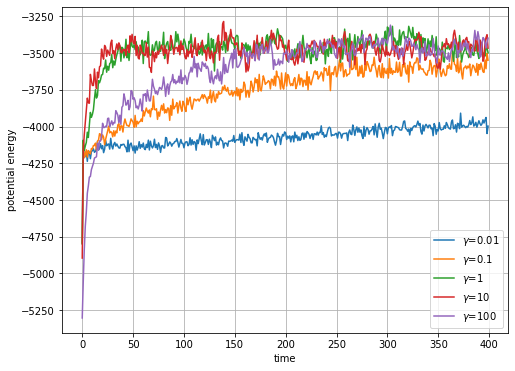

In [18]:
plt.figure(figsize=(8, 6))

for f in friction:
    plt.plot(ene[f][:, 3], label='$\gamma$=%s' % f)

plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('potential energy')
plt.show()

## Point 2
2. Compute the average potential energy for different values of the temperature (ranging from 0.1 to 3 in Lennard Jones units) using a fixed friction (e.g. γ = 1). Also compute the specific heat using energy flucutations and
look at how the specific heat depends on the temperature. Remember that you should discard the initial equilibration.

In [21]:
Ts = np.linspace(0.1,3,30)
print(Ts)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


In [28]:
%%bash

for T in 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0
do
echo $T
cat > Results/in-$T << EOF
inputfile crystal864.xyz
outputfile output.xyz
temperature $T
tstep 0.005
friction 1
forcecutoff 2.5
listcutoff 3.0
nstep 4000
nconfig 10 Results/trajectoryT$T.xyz
nstat 10 Results/energiesT$T.dat
EOF
python3 python/simplemd.py < Results/in-$T
done

Process is terminated.


In [41]:
# potential energy: 3rd column in energiesT$T
# nstat: how often it saves energies data

ene = {}
Ts = np.linspace(0.1, 3, 30)

for temp in Ts:
    ene[temp] = np.loadtxt("Results/energiesT%.1f.dat" % temp)

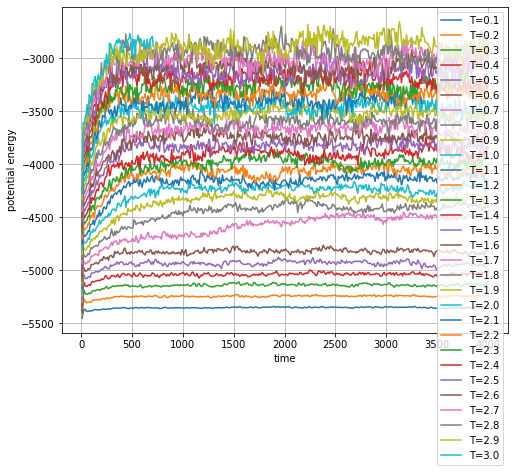

In [50]:
plt.figure(figsize=(8, 6))

for temp in Ts:
    plt.plot(ene[temp][:, 0], ene[temp][:, 3], label='T=%.1f' % temp)

plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('potential energy')
plt.show()

In [43]:
meanUs = []

for T in Ts:
    meanUs.append(np.mean(ene[T][50:, 3]))

print(meanUs)

[-5351.172229211429, -5243.273865102857, -5138.94611092, -5036.929253982857, -4933.798455257143, -4820.8464878085715, -4556.63474976, -4420.537355594286, -4320.134369585714, -4229.520557394286, -4140.310540428572, -4059.913510702857, -3982.00092156, -3900.0116750085713, -3818.9068635657136, -3741.2389320085717, -3661.6303972485716, -3585.792163277142, -3512.9214468885707, -3450.706355602857, -3402.2793054807016, -3330.9317821171426, -3253.01851078, -3193.881162234286, -3128.13673856, -3067.0584128057144, -2999.060866002857, -2936.589501725714, -2876.988588211428, -2856.6396810476194]


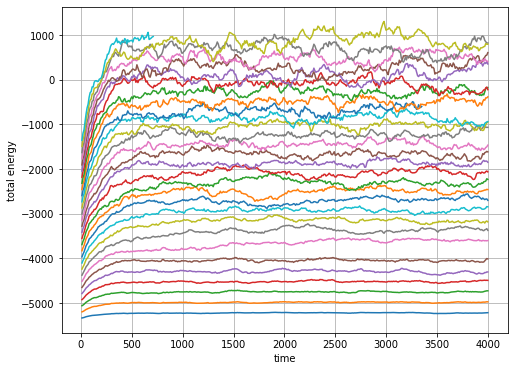

In [44]:
plt.figure(figsize=(8, 6))

for temp in Ts:
    plt.plot(ene[temp][:, 0], ene[temp][:, 4], label='T=%s' % temp)

#plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('total energy')
plt.show()

In [45]:
varEs = []

for T in Ts:
    varEs.append(np.std(ene[T][50:, 4])**2)

print(varEs)

[41.22830525370048, 84.2867848131302, 211.01424803272332, 307.2728338829953, 978.4661359716588, 557.2613424359591, 7819.039083336789, 4975.827449549307, 2920.24693787846, 2510.1170525271245, 3972.8871225469716, 5447.019841860757, 6715.23895787234, 6836.186441620418, 2477.6978350060335, 4814.71799175794, 4652.5507153321705, 5045.392569227759, 5998.632376574976, 7251.961298278049, 8607.300615308002, 6196.944317342256, 6929.522668987417, 11731.733160576361, 17589.04445138664, 17835.69771342653, 13365.988181755469, 18782.901543995522, 29730.441000448896, 2080.1505047323103]


[ 4122.83052537  2107.16962033  2344.60275592  1920.45521177
  3913.86454389  1547.94817343 15957.22261905  7774.73038992
  3605.24313318  2510.11705253  3283.37778723  3782.65266796
  3973.51417626  3487.85022532  1101.19903778  1880.74921553
  1609.87914025  1557.21992877  1661.67101844  1812.99032457
  1951.76884701  1280.36039615  1309.92867089  2036.75922927
  2814.24711222  2638.41682151  1833.46888639  2395.77825816
  3535.12972657   231.12783386]


Text(0, 0.5, 'specific heat')

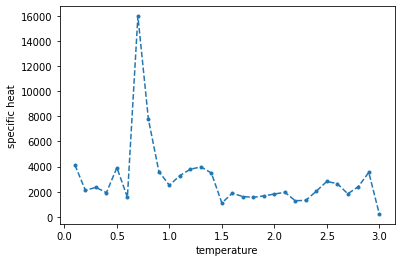

In [46]:
Cv = varEs/Ts**2

print(Cv)

plt.plot(Ts, Cv, '.--')
plt.xlabel('temperature')
plt.ylabel('specific heat')

In [120]:
%%bash
for T in 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9
do
cat > in-$T << EOF
inputfile crystal864.xyz
outputfile output.xyz
temperature $T
tstep 0.005
friction 1
forcecutoff 2.5
listcutoff 3.0
nstep 4000
nconfig 10 trajectoryT$T.xyz
nstat 10 energiesT$T.dat
EOF
python3 python/simplemd.py < in-$T
done

Neighbour list recomputed at step  0
List size:  864000
Neighbour list recomputed at step  18
List size:  864000
Neighbour list recomputed at step  40
List size:  864000
Neighbour list recomputed at step  64
List size:  864000
Neighbour list recomputed at step  86
List size:  864000
Neighbour list recomputed at step  105
List size:  864000
Neighbour list recomputed at step  126
List size:  864000
Neighbour list recomputed at step  146
List size:  864000
Neighbour list recomputed at step  163
List size:  864000
Neighbour list recomputed at step  181
List size:  864000
Neighbour list recomputed at step  201
List size:  864000
Neighbour list recomputed at step  216
List size:  864000
Neighbour list recomputed at step  235
List size:  864000
Neighbour list recomputed at step  253
List size:  864000
Neighbour list recomputed at step  271
List size:  864000
Neighbour list recomputed at step  290
List size:  864000
Neighbour list recomputed at step  309
List size:  864000
Neighbour list recom

[ 557.26134244  768.46483337 1088.79576222 4572.82778866 6996.08491986
 7819.03908334 4221.73279842 4683.51679042 5539.43943784 3466.27359851
 4975.82744955 5295.22227695 2287.75129835 2517.47066677 2536.9715314
 2920.24693788]
[ 1547.94817343  1999.12807849  2658.19277886 10497.76810986
 15129.94143569 15957.22261905  8143.7746883   8552.80641055
  9590.44224003  5697.35962937  7774.73038992  7875.107491
  3242.27791717  3403.82729418  3276.0479486   3605.24313318]


Text(0, 0.5, 'specific heat')

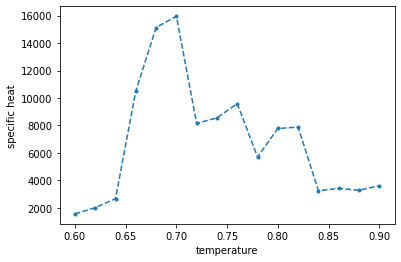

In [122]:
ene={} # a dictionary

Ts=[0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9]
for temp in Ts:
    ene[temp]=np.loadtxt("energiesT" + str(temp) + ".dat")

varEs=np.zeros(len(Ts))
for j in range(len(Ts)):
    varEs[j]=np.std(ene[Ts[j]][50:,4])**2
print(varEs)

Cv=varEs/np.array(Ts)**2
print(Cv)
plt.plot(Ts,Cv,'.--')
plt.xlabel('temperature')
plt.ylabel('specific heat')

3. Repeat the same calculation but starting from a structure that has been equilibrated for a long time at temperature T=3. (hint: simplemd writes the final coordinates on a file, you should restart from that configuration). Are the value of average and fluctuations of U equal or different with respect to previous points? For which values of T do you observe more difference?